In [1]:
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Week 1

In [41]:
data=pd.read_csv('data-set.csv')
columns=data.columns.to_numpy()[1:-3]
data=data.dropna()
data.head()

,Gene_Name,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2,GOBP,GOMF,GOCC
1,RBM47,10.330107,10.396423,10.677257,24.748020,22.426777,24.651200,base conversion or substitution editing;biolog...,binding;nucleic acid binding;nucleotide bindin...,apolipoprotein B mRNA editing enzyme complex;c...
2,ADAM9,12.321340,12.203630,12.233293,19.083593,16.248873,19.281277,activation of MAPKK activity;activation of pro...,binding;catalytic activity;cation binding;coll...,cell part;extracellular region part;extracellu...
3,UBA6,10.827333,10.758463,10.685847,24.614467,21.356450,25.207883,catabolic process;cellular catabolic process;c...,adenyl nucleotide binding;adenyl ribonucleotid...,cell part;cytoplasm;intracellular part
5,SHTN1,10.845517,10.824347,10.634980,26.112690,22.905927,26.138843,axon guidance;chemotaxis;locomotion;response t...,binding;enzyme binding;kinase binding;protein ...,axon;cell part;cell projection;neuron projection
6,SIL1,9.042438,8.924093,9.035878,22.750520,20.598227,23.093443,cellular macromolecule metabolic process;cellu...,binding;protein binding;unfolded protein binding,cell part;cytoplasmic part;endoplasmic reticul...


In [5]:
def plotHisto(num_bins,x,title):
    n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    plt.title(title)
    return plt

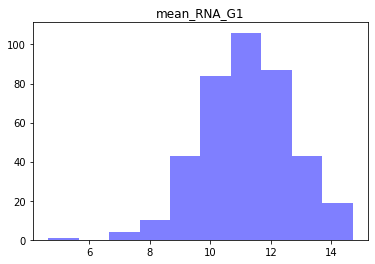

MEAN 11.215627083957184
VARIANCE 2.1605056140324033


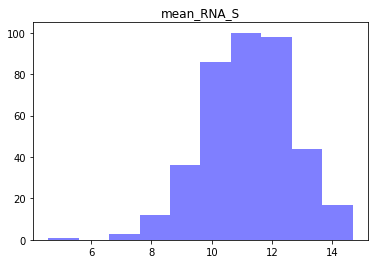

MEAN 11.186962324942067
VARIANCE 2.14559197027701


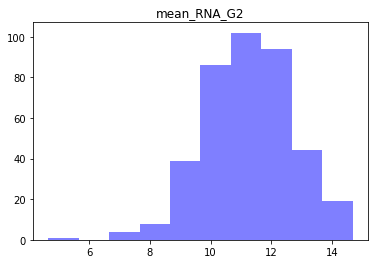

MEAN 11.257939490392948
VARIANCE 2.1016486426150935


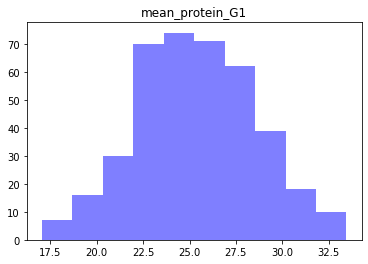

MEAN 25.35167163725439
VARIANCE 10.453573575282366


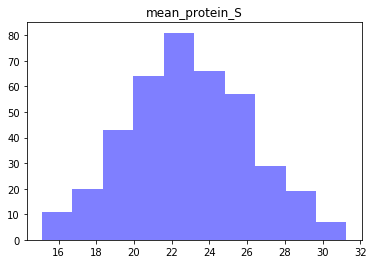

MEAN 22.847657779143564
VARIANCE 10.403018439314257


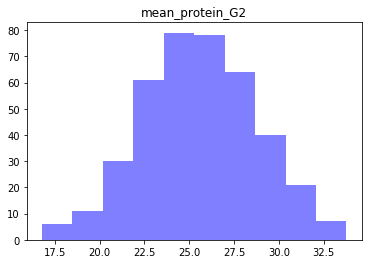

MEAN 25.573552669974784
VARIANCE 10.01821702019506


In [30]:
for c in columns:
    plotHisto(10,data[c],c)
    print("MEAN",data[c].mean())
    print("VARIANCE",data[c].var())
##Protein seem to produce better gaussian
##variance is larger in proteien same as mean

In [7]:
(data["mean_RNA_G1"],data["mean_protein_G1"])

(1      10.330107
 2      12.321340
 3      10.827333
 5      10.845517
 6       9.042438
 9       8.022649
 10      9.598898
 11     11.417633
 14     11.870490
 15     10.988027
 18     11.290923
 19      9.481807
 21     11.529160
 22      9.368756
 26     10.040864
 27     13.515667
 29     10.345687
 30     11.961503
 32     10.901957
 33      9.617080
 34      9.271090
 35     11.839233
 36     11.202663
 37     10.106010
 38     11.758000
 39      9.312350
 40      9.997203
 42     12.298660
 43     14.349673
 44     11.669223
          ...    
 464    13.348500
 465    12.343283
 466    10.331277
 467    13.184257
 468    13.933803
 469    11.267453
 470    10.604260
 472     9.814781
 473    11.154997
 475    12.405207
 477    10.516497
 478    10.770360
 479    12.521827
 480     8.915661
 481    13.227887
 482     9.935081
 483    10.917933
 484    12.396690
 486    11.125703
 487    11.271983
 488    13.149193
 489    11.227667
 490    11.589780
 491    13.845000
 492    11

In [8]:
print("G1 correlation ", (data['mean_RNA_G1'].corr(data['mean_protein_G1'])))
print("S correlation ", data['mean_RNA_S'].corr(data['mean_protein_S']))
print("G2 correlation ", data['mean_RNA_G2'].corr(data['mean_protein_G2']))
##correlation are the same between each generation or phase between protein and RNA

G1 correlation  0.522657733095991
S correlation  0.5361902686754969
G2 correlation  0.5325650185143902


In [9]:
def scatter(x,y,c,tit):
    plt.scatter(x, y, label=tit, color=c, alpha=0.5)
    plt.title('RNA vs Protein')
    plt.xlabel('RNA')
    plt.ylabel('Protein')
    plt.legend()
    plt.show()
    
def fitLinearModel(x,y):
#     plt.scatter(x, y, label=tit, color=c, alpha=0.5)
    weights=np.polyfit(x,y,1)
    weights=list(reversed(weights))
    #print(weights)
    predictions=np.polynomial.polynomial.polyval(x,weights)
#     plt.plot(x, predictions, label=tit, color=c, alpha=0.5)
    slope, intercept =round(weights[1],2),  round(weights[0],2)
#     plt.title("RNA vs Proten "+tit+'\nslope='+str(slope)+ '   intercept='+str(intercept))
#     plt.xlabel('RNA')
#     plt.ylabel('Protein')
    return intercept,slope,predictions
    
# def fitModels():
#     colours="rby"
#     cycle=["G1","S","G2"]
#     xs=["mean_RNA_G1","mean_RNA_S","mean_RNA_G2"]
#     ys=["mean_Protein_G1","mean_Protein_S","mean_Protein_G2"]
#     for i in range(3):
#        fitLinearModel(data[xs[i]],data[ys[i]],cycle[i],colours[i]) 


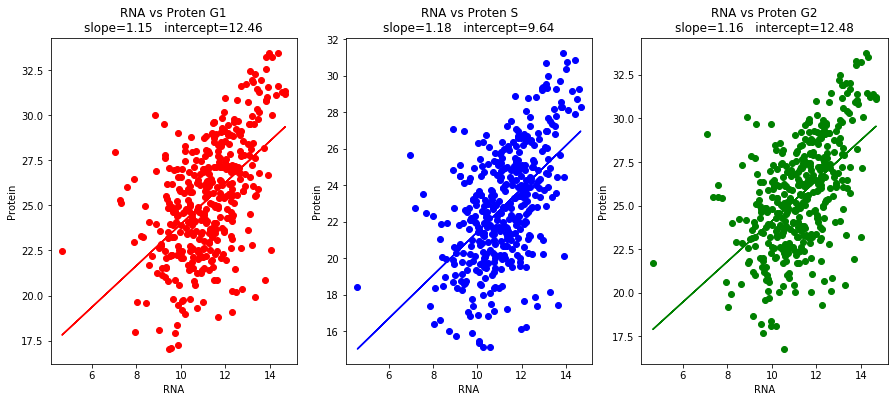

In [12]:
fig, ax = plt.subplots(figsize=(15,6),nrows=1, ncols=3)
colours=["r","b","g"]
title=["G1","S","G2"]

for i in range(3):
    ax[i].scatter(data["mean_RNA_"+title[i]],data["mean_protein_"+title[i]],color=colours[i])
    inc,slp,ys=fitLinearModel(data["mean_RNA_"+title[i]],data["mean_protein_"+title[i]])
    ax[i].plot(data["mean_RNA_"+title[i]],ys,color=colours[i])
    tit="RNA vs Proten "+title[i]+'\nslope='+str(slp)+ '   intercept='+str(inc)
    ax[i].set(title=tit,xlabel="RNA",ylabel="Protein")


In [13]:
## Tutorial conclusion 
# The correlation between Concentratation of RNA and protein is approx 0.5 over all cell cycles which indicate there exist 50% 
# of relation between which mean there are other factors that contribute to Protein concentraion. from Graphs avove we can see 
# that weve got many outlier(points far away from line). Hoever we do get percentage of them almost correct that due to having 
# 0.5 correlation.

# Week 2

In [16]:
def filterData(col,sub,fdata):
    return fdata[fdata[col].str.contains(sub)]
def plotFigure(scatterData,plotData,titar,figTitle):
    fig, ax = plt.subplots(figsize=(15,6),nrows=1, ncols=3)
    fig.suptitle(figTitle ,fontsize=10)
    for i in range(3):
        ax[i].scatter(scatterData["mean_RNA_"+titar[i]],scatterData["mean_protein_"+titar[i]],color='black')
        ax[i].scatter(plotData["mean_RNA_"+titar[i]],plotData["mean_protein_"+titar[i]],color=colours[i])
        inc,slp,ys=fitLinearModel(plotData["mean_RNA_"+titar[i]],plotData["mean_protein_"+titar[i]])
        ax[i].plot(plotData["mean_RNA_"+titar[i]],ys,color=colours[i])
        corr=round((plotData['mean_RNA_'+titar[i]]).corr(plotData['mean_protein_'+titar[i]]),2)
        tit="RNA vs Protein "+titar[i]+'\n corr='+str(corr)+'  slope='+str(slp)+ '   intercept='+str(inc)
        ax[i].set(title=tit,xlabel="RNA",ylabel="Protein")
        
def plotScatter(col,sub,scatterData,title):
    filtered=filterData(col,sub,scatterData)
    plotFigure(scatterData,filtered,title,sub)

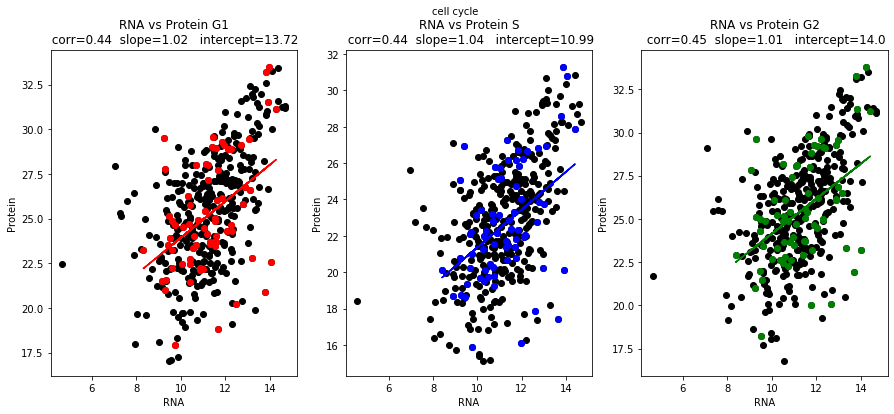

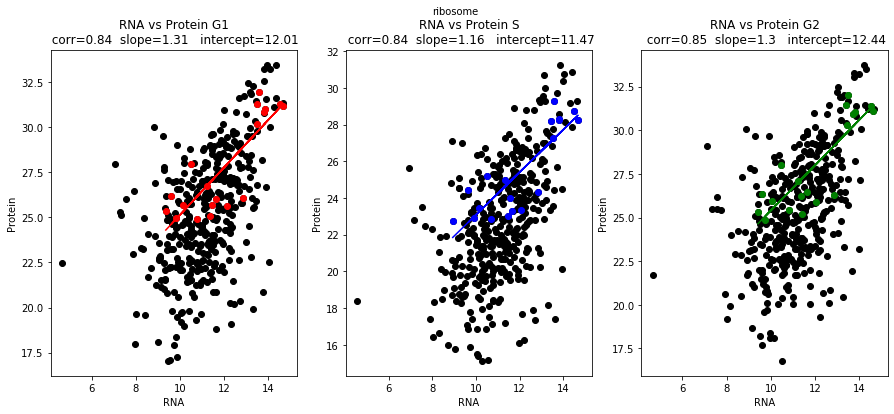

In [17]:
## cell cycle
plotScatter("GOBP","cell cycle",data,title)
##we can notice that in all cycles the correlation has decreased which indicate we have more outliers
plotScatter("GOCC","ribosome",data,title)
## correlation has increased with point very close to line of best fit

In [18]:
GOBPterms=set()
values=[]
##extract the terms in set
for s in data["GOBP"].head(5):
    for sp in (s.split(";")):
        GOBPterms.add(sp)

for t in GOBPterms:
    fil=filterData("GOBP",t,data)
    values.append(fil["mean_RNA_G1"].count())
    ##print(t+"\t"+str(fil["mean_RNA_G1"].count()))
# con = pd.DataFrame()
# con["Term"]=pd.Series(list(GOBPterms))
# con["count"]=values
print(data.GOBP.str.split(';',expand=True).stack().value_counts())


##having higher frequncey givne us better understanding on correlation
##reduce the effect of the outliers

cellular process                                                                         377
metabolic process                                                                        273
cellular metabolic process                                                               260
primary metabolic process                                                                255
biological regulation                                                                    236
regulation of biological process                                                         225
regulation of cellular process                                                           211
macromolecule metabolic process                                                          211
cellular macromolecule metabolic process                                                 201
nitrogen compound metabolic process                                                      167
cellular nitrogen compound metabolic process                          

In [19]:
def varianceScaling(ser):
    return (ser-ser.min())/(ser.max()-ser.min())

In [20]:
diffData=pd.DataFrame()
diffTitle=["G1-S","S-G2","G2-G1"]
for i in diffTitle:
    cycles=i.split("-")
    print(cycles)
    rna=data["mean_RNA_"+cycles[0]]-data["mean_RNA_"+cycles[1]]
    prot=data["mean_protein_"+cycles[0]]-data["mean_protein_"+cycles[1]]
    
    ##mean centering | variance Scaling
#     mr=rna.mean()
#     mp=prot.mean()
    diffData["mean_RNA_"+i]=(rna-rna.mean())/(rna.std())
    diffData["mean_protein_"+i]=(prot-prot.mean()/(prot.std()))
    
    
    
    ## adding annotation columns (redundant step)
    diffData["GOBP"]=data["GOBP"]
    diffData["GOMF"]=data["GOMF"]
    diffData["GOCC"]=data["GOCC"]

['G1', 'S']
['S', 'G2']
['G2', 'G1']


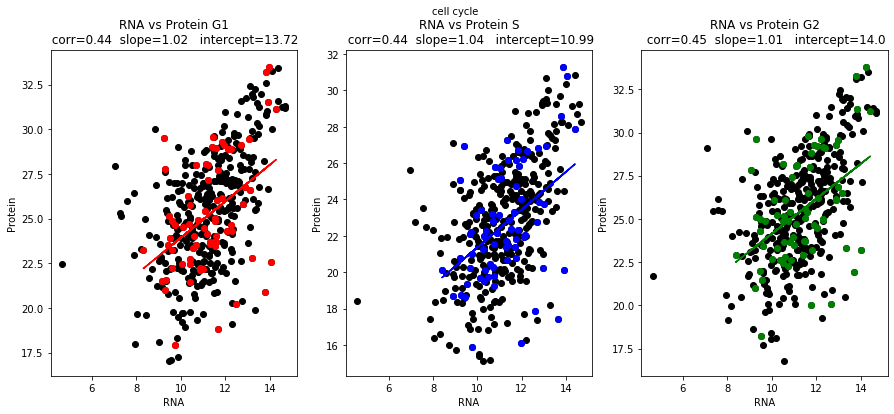

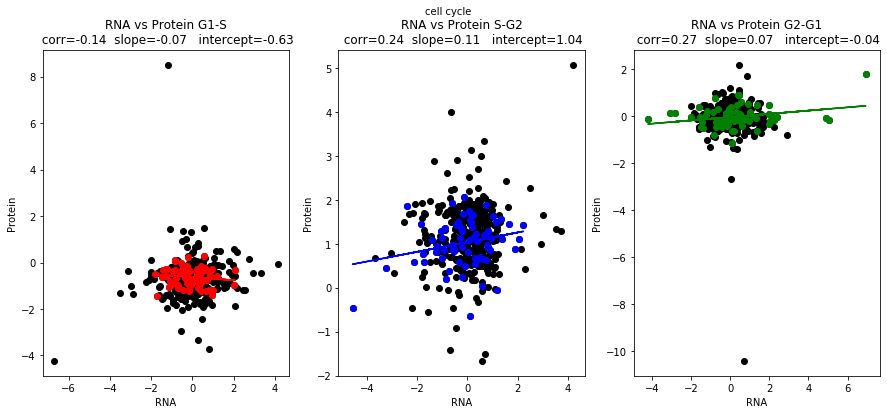

In [31]:

col="GOBP"
su="cell cycle"
plotScatter(col,su,data,title)
plotScatter(col,su,diffData,diffTitle)

## taking G1-S, S-G2 and G2-G1 seem to perform worst than comparing cycles as done as the begining this week tutorial

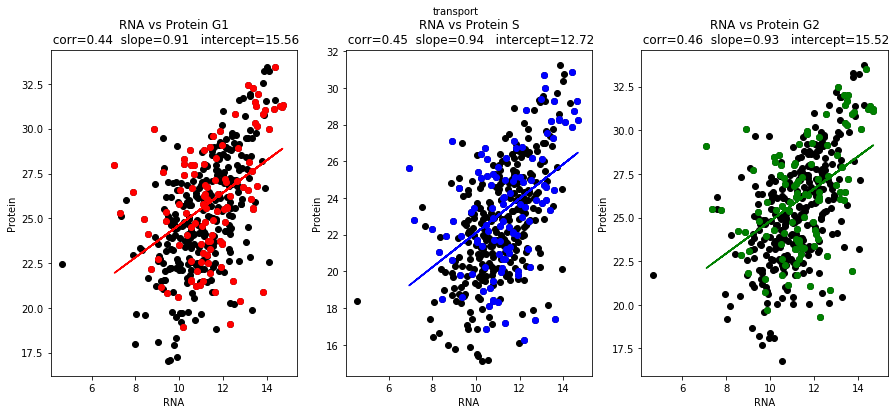

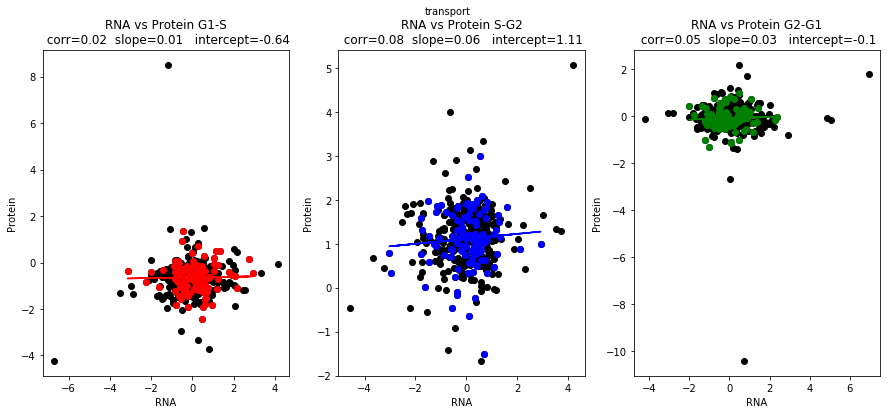

In [35]:
col="GOBP"
su="transport"
plotScatter(col,su,data,title)
plotScatter(col,su,diffData,diffTitle)

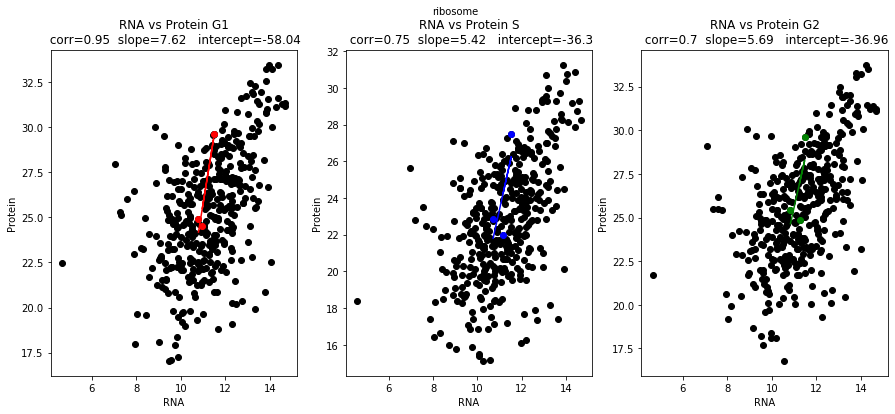

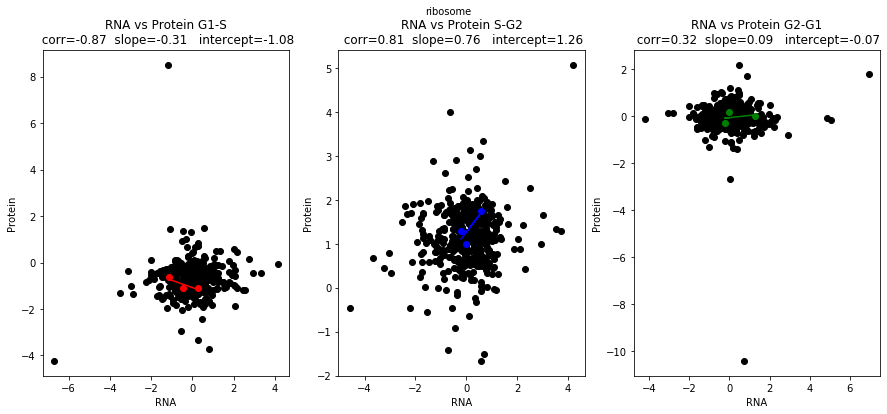

In [34]:
col="GOBP"
su="ribosome"
plotScatter(col,su,data,title)
plotScatter(col,su,diffData,diffTitle)

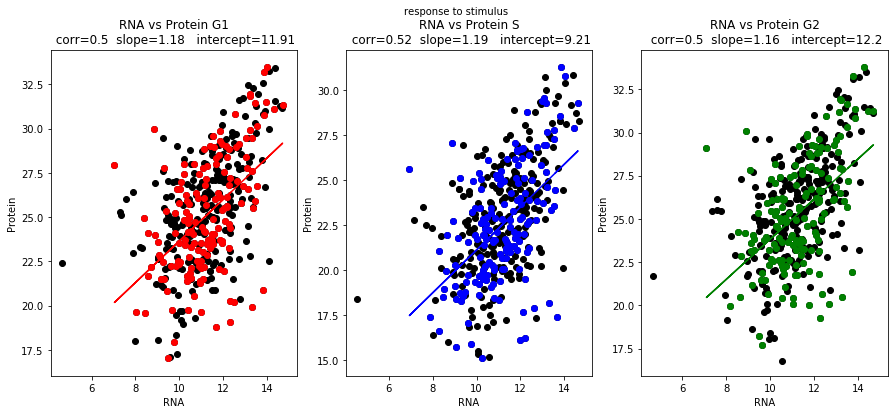

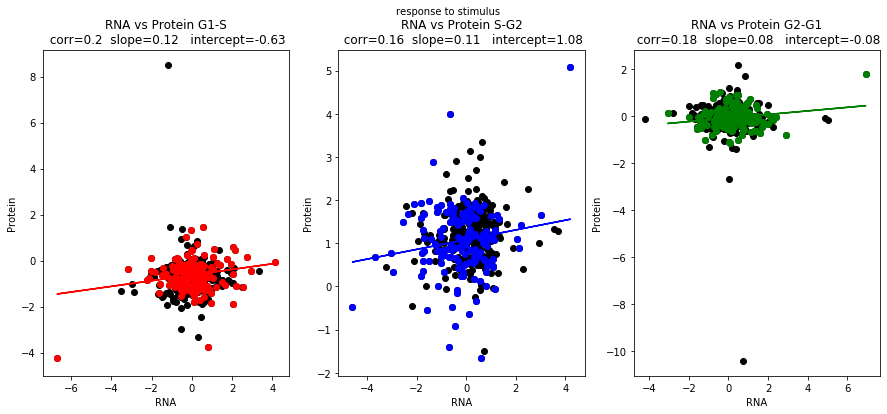

In [40]:
col="GOBP"
su="response to stimulus"
plotScatter(col,su,data,title)
plotScatter(col,su,diffData,diffTitle)

TypeError: expected non-empty vector for x

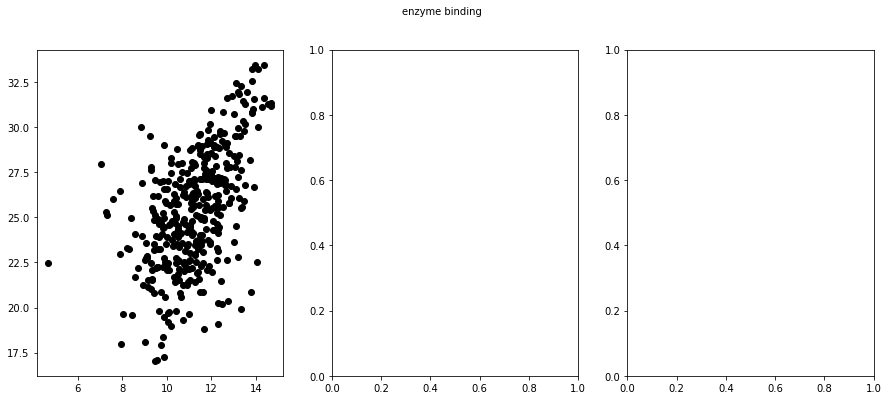